In [56]:
# making a copy of the dataframe
ccard_df = ccard_df.copy()

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
ccard_df = pd.read_csv('/Users/jadeelajala/Downloads/ccard.csv', header = None)
ccard_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
# assign labels to the features
col_names = [f'A{n}' for n in range(1,len(ccard_df.columns))]
col_names.append('Outcome')
ccard_df.columns = col_names
ccard_df.head(n=3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Outcome
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


In [4]:
# get info about the dataset
print(ccard_df.info())

print()

print(ccard_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       690 non-null    object 
 1   A2       690 non-null    object 
 2   A3       690 non-null    float64
 3   A4       690 non-null    object 
 4   A5       690 non-null    object 
 5   A6       690 non-null    object 
 6   A7       690 non-null    object 
 7   A8       690 non-null    float64
 8   A9       690 non-null    object 
 9   A10      690 non-null    object 
 10  A11      690 non-null    int64  
 11  A12      690 non-null    object 
 12  A13      690 non-null    object 
 13  A14      690 non-null    object 
 14  A15      690 non-null    int64  
 15  Outcome  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None

               A3          A8        A11            A15
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406

# Cleaning Data

In [6]:
#check for Null entries
ccard_df.isnull().sum()

A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14        0
A15        0
Outcome    0
dtype: int64

In [7]:
# pulling out entries based on column A1 which may not contain alphabets
ccard_df[~ccard_df['A1'].apply(lambda x: x.isalpha())]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Outcome
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
327,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,01160,0,-
346,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,00372,122,-
374,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,00260,1004,-
453,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,00300,0,-
479,?,26.50,2.710,y,p,?,?,0.085,f,f,0,f,s,00080,0,-
489,?,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,00263,0,-
520,?,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,00160,234,+
598,?,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,00240,768,+
601,?,42.25,1.750,y,p,?,?,0.000,f,f,0,t,g,00150,1,-


In [8]:
# replace column a1 with nan

ccard_df.replace('?', np.nan, inplace=True)

In [9]:
# check if all entries are of the same length
all(ccard_df['A14'].dropna().apply(lambda x: len(str(x)) == 5))

True

In [10]:
# check the entries in that columns
ccard_df['A14'].unique()

array(['00202', '00043', '00280', '00100', '00120', '00360', '00164',
       '00080', '00180', '00052', '00128', '00260', '00000', '00320',
       '00396', '00096', '00200', '00300', '00145', '00500', '00168',
       '00434', '00583', '00030', '00240', '00070', '00455', '00311',
       '00216', '00491', '00400', '00239', '00160', '00711', '00250',
       '00520', '00515', '00420', nan, '00980', '00443', '00140', '00094',
       '00368', '00288', '00928', '00188', '00112', '00171', '00268',
       '00167', '00075', '00152', '00176', '00329', '00212', '00410',
       '00274', '00375', '00408', '00350', '00204', '00040', '00181',
       '00399', '00440', '00093', '00060', '00395', '00393', '00021',
       '00029', '00102', '00431', '00370', '00024', '00020', '00129',
       '00510', '00195', '00144', '00380', '00049', '00050', '00381',
       '00150', '00117', '00056', '00211', '00230', '00156', '00022',
       '00228', '00519', '00253', '00487', '00220', '00088', '00073',
       '00121',

In [11]:
#drop column A14 bcos it could be a postal code which is not needed - bcos its 5 digit and will not be needed
ccard_df = ccard_df.drop('A14', axis=1)

In [13]:
# check if all features are right data type

ccard_df = ccard_df.astype({'A2':'float'})

In [14]:
# determine null entries
print('Columns: # missing entries')
print('--------------------------')
ccard_df.isnull().sum()

Columns: # missing entries
--------------------------


A1         12
A2         12
A3          0
A4          6
A5          6
A6          9
A7          9
A8          0
A9          0
A10         0
A11         0
A12         0
A13         0
A15         0
Outcome     0
dtype: int64

# Handling missing values

In [17]:
# performing data inputation
for col in ccard_df.columns:
    if ccard_df[col].dtypes == 'object':
        # getting the mode of the categorical column
        most_freq_value = ccard_df[col].value_counts().index[0]
        ccard_df[col].fillna(most_freq_value,inplace=True)
    else:
        # using the mean for non categorical features
        mean_value = ccard_df[col].mean()
        ccard_df[col].fillna(mean_value,inplace=True)


In [18]:
ccard_df.isnull().sum()

A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A15        0
Outcome    0
dtype: int64

In [19]:
#convert the outcome column '= and '-' to 1 and 0
ccard_df['Outcome'] = ccard_df['Outcome'].apply(lambda x: 1 if x=='+' else 0)

# Exploratory Analysis

In [20]:
# splitting the dataframe into categorical and numerical features
cat_col = [col_name for col_name in ccard_df.columns if ccard_df[col_name].dtypes == 'object']
num_col = [col_name for col_name in ccard_df.columns if ccard_df[col_name].dtypes != 'object']

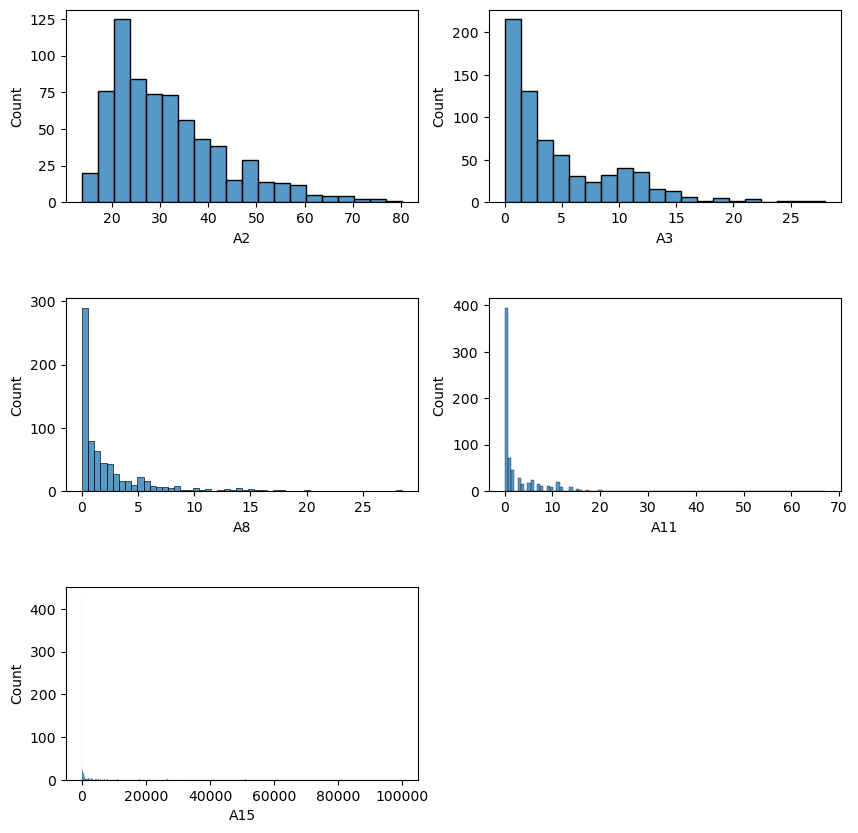

In [21]:
fig = plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for counter, elmt in enumerate(num_col[:-1]):
    axs = plt.subplot(3, 2, counter + 1)
    sns.histplot(data=ccard_df, x=elmt, ax=axs)

plt.show()

#From the above, this indicate that the feature are highly skewed

In [22]:
#renaming columns
ccard_df = ccard_df.rename(columns={'A2':'age','A11':'creditScore','A15':'income',\
                      'A3':'debt','A8':'yearsOfEmployment'})
ccard_df.head(n=2)

,A1,age,debt,A4,A5,A6,A7,yearsOfEmployment,A9,A10,creditScore,A12,A13,income,Outcome
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,0,1
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,560,1


In [23]:
#To handle the skewedness we have to normalise and transform by using the logarithm and observe the result

# getting back the numerical columns since the columns have be  renamed 
num_col = [col_name for col_name in ccard_df.columns 
           if ccard_df[col_name].dtypes != 'object']

In [24]:
# Using the debt column for testing
df_transform = pd.DataFrame(columns = {'raw','log','logNorm'})
df_transform['raw'] = ccard_df['debt']

# create a column with the entries in log
df_transform['log'] = ccard_df['debt'].apply(lambda x: np.log10(x) if x!=0 else 0)

# calculating the z-score of the log columns
df_transform['logNorm'] = (df_transform['log'] - df_transform['log'].mean())/df_transform['log'].std()
df_transform = df_transform[['raw','log','logNorm']]
df_transform.head()

,raw,log,logNorm
0,0.000,0.000000,-0.736568
1,4.460,0.649335,0.443026
2,0.500,-0.301030,-1.283425
3,1.540,0.187521,-0.395915
4,5.625,0.750123,0.626118


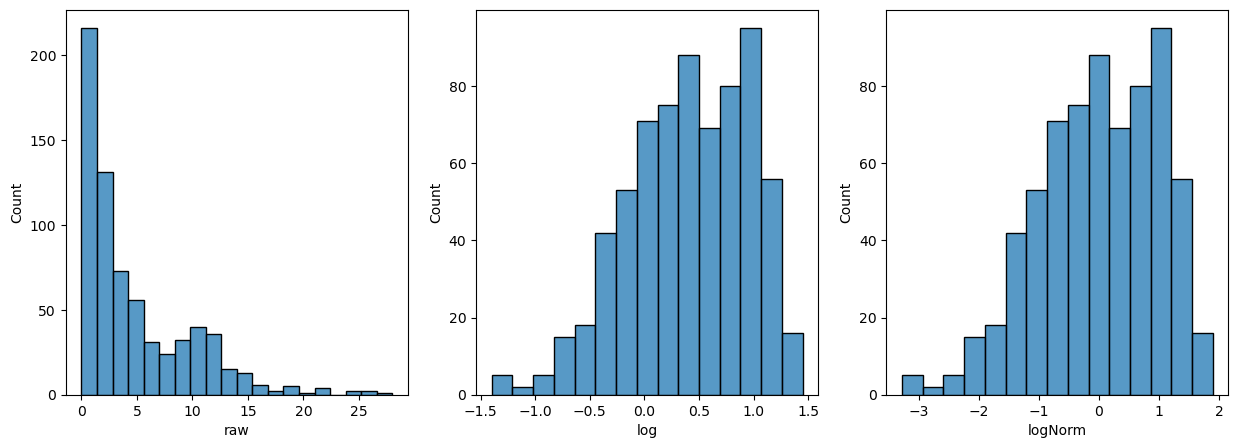

In [25]:
# observe the output
fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=0.5)
for j,item in enumerate(list(df_transform.columns)):
    axs = plt.subplot(1,3,j+1)
    sns.histplot(data=df_transform,x=item,ax=axs)

#The above shows decrease in skewedness as seen in the 'log'figure.



In [26]:
# taking the log, the last column is not included since that is the target variable
ccard_df[num_col[:-1]]= ccard_df[num_col[:-1]].applymap(lambda x: np.log(x)
                                                      if x!=0 else 0)

In [27]:
# calculate z-score of the entire dataframe
from scipy.stats import zscore
ccard_df[num_col[:-1]] = ccard_df[num_col[:-1]].apply(zscore)

<AxesSubplot:xlabel='debt', ylabel='Count'>

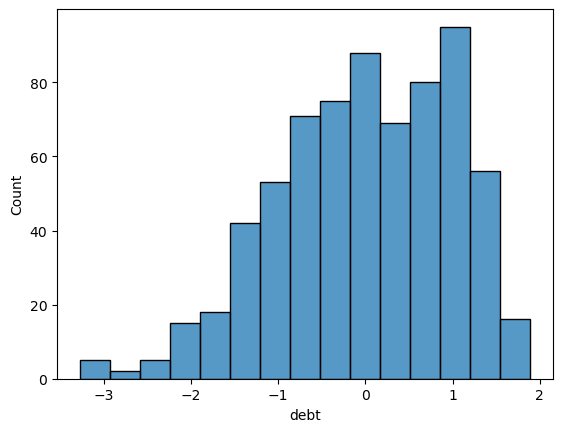

In [28]:
#Plot the feature 'debt' again 
sns.histplot(data=ccard_df, x='debt')

<AxesSubplot:>

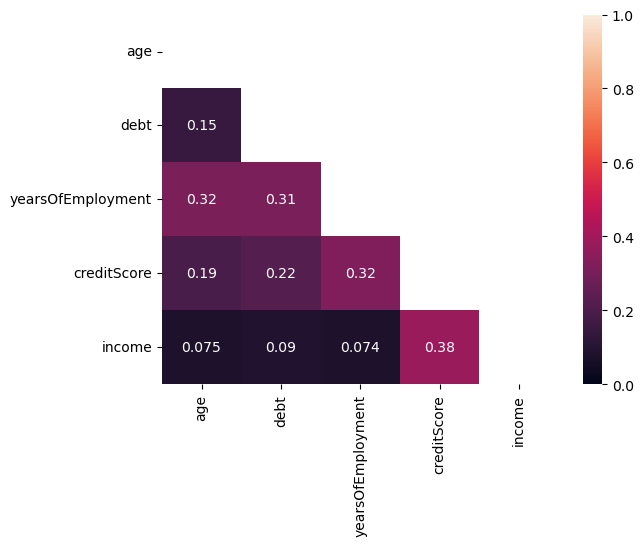

In [29]:
# observe the relationship among the features. 
data_cor = ccard_df[num_col[:-1]].corr()
mask = np.triu(data_cor)
sns.heatmap(data_cor, mask=mask, vmin=0,vmax=1,annot=True)

In [30]:
# from the above, all the features are poorly correlated among themselves, we are keeping all of them.


Text(0.5, 1.0, 'Accepted versus denied applications')

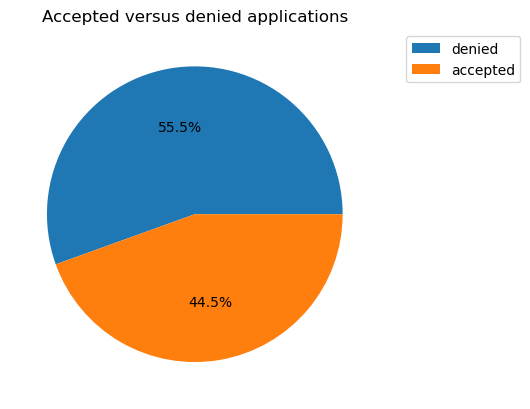

In [31]:
#The distribution of the target variable looks like

#piechart 
pieChart = ccard_df['Outcome'].value_counts()
plt.pie(pieChart, autopct='%1.1f%%')
plt.legend(labels = ['denied','accepted'], loc='upper right', bbox_to_anchor=(1.4,1))
plt.title('Accepted versus denied applications')

In [32]:
# The proportions of accepted versus denied is adequate for the models to accurately predicts the impact of features on them. Next let's observe how these features are related to our target variable.

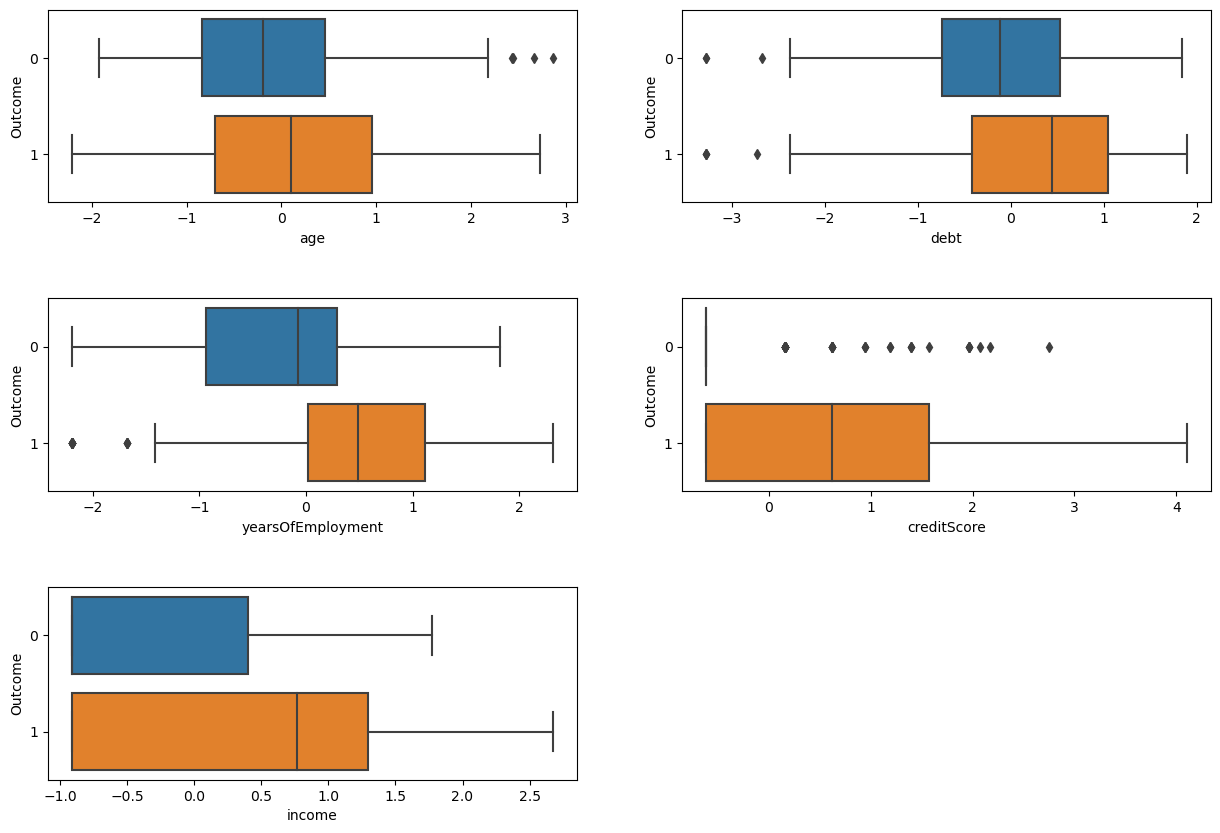

In [34]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
for i,item in enumerate(num_col[:-1]):
    axs = plt.subplot(3,2,i+1)
    sns.boxplot(data=ccard_df, x=item,y='Outcome', orient='h', ax=axs)

In [35]:
# import the required modules

from sklearn.feature_selection import SelectKBest, f_regression

X_fs = ccard_df[num_col[:-1]]
y_fs = ccard_df[num_col[-1]]
fs = SelectKBest(score_func=f_regression,k=5)
X_new = fs.fit_transform(X_fs,y_fs)

<AxesSubplot:ylabel='feature'>

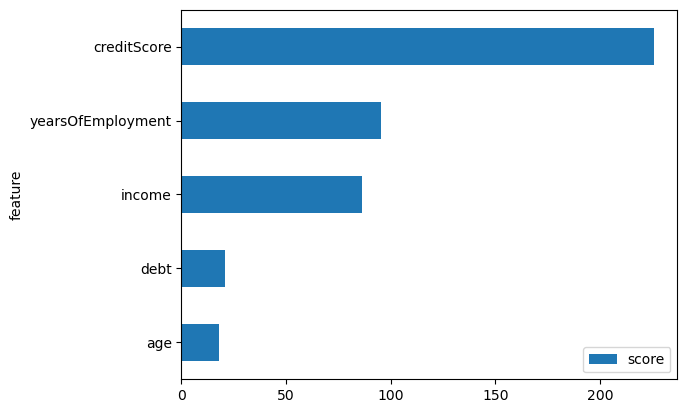

In [36]:
# save the output to a dataframe for ease of plotting.
featureScores = pd.DataFrame({'feature':X_fs.columns,'score':fs.scores_})
featureScores.sort_values(by='score').plot(kind='barh',x='feature',y='score')


In [38]:
# # from the above, it shows that creditscore and years of employment are the most important features 

In [40]:
# categorical features 
for feature in cat_col:
    print(f'{feature} has these unique entries {ccard_df[feature].unique()}')

A1 has these unique entries ['b' 'a']
A4 has these unique entries ['u' 'y' 'l']
A5 has these unique entries ['g' 'p' 'gg']
A6 has these unique entries ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
A7 has these unique entries ['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
A9 has these unique entries ['t' 'f']
A10 has these unique entries ['t' 'f']
A12 has these unique entries ['f' 't']
A13 has these unique entries ['g' 's' 'p']


In [41]:
# a look at the content of the 1st two features
ccard_df[cat_col[:2]].head(n=2)

,A1,A4
0,b,u
1,a,u


In [42]:
# a look at the output of encoding
df = pd.get_dummies(ccard_df[cat_col[:2]], drop_first=True)
df.head(n=2)

,A1_b,A4_u,A4_y
0,1,1,0
1,0,1,0


# Model Fit 
#using Logistic regression (because it assigns 50-50 probability of binary targets)

In [45]:
# For prediction, the following steps will be done:
# 1. Split the data for train and testing purpose 
#2. Transformation: use zscore to put the on the same scale


In [52]:
#To prevent data leakage, we repeat some previous steps


In [62]:
# getting the features and target variable
X = ccard_df.drop('Outcome',axis=1)
y=ccard_df['Outcome']


In [63]:
#split the data for training and testing 
from sklearn.model_selection import train_test_split
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [64]:
#Transformation step into pipeline

# import the pipeline
from sklearn.pipeline import Pipeline

# required for imputation
from sklearn.impute import SimpleImputer

# package required for scaling and getting the dummy variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# column transformers to apply transformation to specified columns
from sklearn.compose import ColumnTransformer

In [65]:
# pipeline to apply transformation to categorical features
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# pipeline to apply transformation to categorical features
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

# define the transformer and supply it the features to transform
preprocessing_steps = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

# Prediction

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_pipeline = Pipeline(steps=[
    ('transformer',preprocessing_steps),
    ('logreg',logreg)
])

In [67]:
# pass the data to the pipeline
logreg_pipeline.fit(X_train,y_train)
# make a prediction
y_pred = logreg_pipeline.predict(X_test)
# observe the scores
score = logreg_pipeline.score(X_test,y_test)
print(f'The accuracy of the model is = {score}')

The accuracy of the model is = 0.855072463768116


The accuracy score 0.8551 indicates that the model correctly predicted the target variable for approximately 85.51% of the instance in the test set. This score is often used as a measure of the model's overall predictive performance. 